In [1]:
import collections
import os
import tempfile
import copy

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import urllib

import tensorflow as tf
print(tf.__version__)


2.11.0


In [2]:
COCO_META = [
    {
        'color': [220, 20, 60],
        'isthing': 1,
        'id': 1,
        'name': 'person'
    },
    {
        'color': [119, 11, 32],
        'isthing': 1,
        'id': 2,
        'name': 'bicycle'
    },
    {
        'color': [0, 0, 142],
        'isthing': 1,
        'id': 3,
        'name': 'car'
    },
    {
        'color': [0, 0, 230],
        'isthing': 1,
        'id': 4,
        'name': 'motorcycle'
    },
    {
        'color': [106, 0, 228],
        'isthing': 1,
        'id': 5,
        'name': 'airplane'
    },
    {
        'color': [0, 60, 100],
        'isthing': 1,
        'id': 6,
        'name': 'bus'
    },
    {
        'color': [0, 80, 100],
        'isthing': 1,
        'id': 7,
        'name': 'train'
    },
    {
        'color': [0, 0, 70],
        'isthing': 1,
        'id': 8,
        'name': 'truck'
    },
    {
        'color': [0, 0, 192],
        'isthing': 1,
        'id': 9,
        'name': 'boat'
    },
    {
        'color': [250, 170, 30],
        'isthing': 1,
        'id': 10,
        'name': 'traffic light'
    },
    {
        'color': [100, 170, 30],
        'isthing': 1,
        'id': 11,
        'name': 'fire hydrant'
    },
    {
        'color': [220, 220, 0],
        'isthing': 1,
        'id': 13,
        'name': 'stop sign'
    },
    {
        'color': [175, 116, 175],
        'isthing': 1,
        'id': 14,
        'name': 'parking meter'
    },
    {
        'color': [250, 0, 30],
        'isthing': 1,
        'id': 15,
        'name': 'bench'
    },
    {
        'color': [165, 42, 42],
        'isthing': 1,
        'id': 16,
        'name': 'bird'
    },
    {
        'color': [255, 77, 255],
        'isthing': 1,
        'id': 17,
        'name': 'cat'
    },
    {
        'color': [0, 226, 252],
        'isthing': 1,
        'id': 18,
        'name': 'dog'
    },
    {
        'color': [182, 182, 255],
        'isthing': 1,
        'id': 19,
        'name': 'horse'
    },
    {
        'color': [0, 82, 0],
        'isthing': 1,
        'id': 20,
        'name': 'sheep'
    },
    {
        'color': [120, 166, 157],
        'isthing': 1,
        'id': 21,
        'name': 'cow'
    },
    {
        'color': [110, 76, 0],
        'isthing': 1,
        'id': 22,
        'name': 'elephant'
    },
    {
        'color': [174, 57, 255],
        'isthing': 1,
        'id': 23,
        'name': 'bear'
    },
    {
        'color': [199, 100, 0],
        'isthing': 1,
        'id': 24,
        'name': 'zebra'
    },
    {
        'color': [72, 0, 118],
        'isthing': 1,
        'id': 25,
        'name': 'giraffe'
    },
    {
        'color': [255, 179, 240],
        'isthing': 1,
        'id': 27,
        'name': 'backpack'
    },
    {
        'color': [0, 125, 92],
        'isthing': 1,
        'id': 28,
        'name': 'umbrella'
    },
    {
        'color': [209, 0, 151],
        'isthing': 1,
        'id': 31,
        'name': 'handbag'
    },
    {
        'color': [188, 208, 182],
        'isthing': 1,
        'id': 32,
        'name': 'tie'
    },
    {
        'color': [0, 220, 176],
        'isthing': 1,
        'id': 33,
        'name': 'suitcase'
    },
    {
        'color': [255, 99, 164],
        'isthing': 1,
        'id': 34,
        'name': 'frisbee'
    },
    {
        'color': [92, 0, 73],
        'isthing': 1,
        'id': 35,
        'name': 'skis'
    },
    {
        'color': [133, 129, 255],
        'isthing': 1,
        'id': 36,
        'name': 'snowboard'
    },
    {
        'color': [78, 180, 255],
        'isthing': 1,
        'id': 37,
        'name': 'sports ball'
    },
    {
        'color': [0, 228, 0],
        'isthing': 1,
        'id': 38,
        'name': 'kite'
    },
    {
        'color': [174, 255, 243],
        'isthing': 1,
        'id': 39,
        'name': 'baseball bat'
    },
    {
        'color': [45, 89, 255],
        'isthing': 1,
        'id': 40,
        'name': 'baseball glove'
    },
    {
        'color': [134, 134, 103],
        'isthing': 1,
        'id': 41,
        'name': 'skateboard'
    },
    {
        'color': [145, 148, 174],
        'isthing': 1,
        'id': 42,
        'name': 'surfboard'
    },
    {
        'color': [255, 208, 186],
        'isthing': 1,
        'id': 43,
        'name': 'tennis racket'
    },
    {
        'color': [197, 226, 255],
        'isthing': 1,
        'id': 44,
        'name': 'bottle'
    },
    {
        'color': [171, 134, 1],
        'isthing': 1,
        'id': 46,
        'name': 'wine glass'
    },
    {
        'color': [109, 63, 54],
        'isthing': 1,
        'id': 47,
        'name': 'cup'
    },
    {
        'color': [207, 138, 255],
        'isthing': 1,
        'id': 48,
        'name': 'fork'
    },
    {
        'color': [151, 0, 95],
        'isthing': 1,
        'id': 49,
        'name': 'knife'
    },
    {
        'color': [9, 80, 61],
        'isthing': 1,
        'id': 50,
        'name': 'spoon'
    },
    {
        'color': [84, 105, 51],
        'isthing': 1,
        'id': 51,
        'name': 'bowl'
    },
    {
        'color': [74, 65, 105],
        'isthing': 1,
        'id': 52,
        'name': 'banana'
    },
    {
        'color': [166, 196, 102],
        'isthing': 1,
        'id': 53,
        'name': 'apple'
    },
    {
        'color': [208, 195, 210],
        'isthing': 1,
        'id': 54,
        'name': 'sandwich'
    },
    {
        'color': [255, 109, 65],
        'isthing': 1,
        'id': 55,
        'name': 'orange'
    },
    {
        'color': [0, 143, 149],
        'isthing': 1,
        'id': 56,
        'name': 'broccoli'
    },
    {
        'color': [179, 0, 194],
        'isthing': 1,
        'id': 57,
        'name': 'carrot'
    },
    {
        'color': [209, 99, 106],
        'isthing': 1,
        'id': 58,
        'name': 'hot dog'
    },
    {
        'color': [5, 121, 0],
        'isthing': 1,
        'id': 59,
        'name': 'pizza'
    },
    {
        'color': [227, 255, 205],
        'isthing': 1,
        'id': 60,
        'name': 'donut'
    },
    {
        'color': [147, 186, 208],
        'isthing': 1,
        'id': 61,
        'name': 'cake'
    },
    {
        'color': [153, 69, 1],
        'isthing': 1,
        'id': 62,
        'name': 'chair'
    },
    {
        'color': [3, 95, 161],
        'isthing': 1,
        'id': 63,
        'name': 'couch'
    },
    {
        'color': [163, 255, 0],
        'isthing': 1,
        'id': 64,
        'name': 'potted plant'
    },
    {
        'color': [119, 0, 170],
        'isthing': 1,
        'id': 65,
        'name': 'bed'
    },
    {
        'color': [0, 182, 199],
        'isthing': 1,
        'id': 67,
        'name': 'dining table'
    },
    {
        'color': [0, 165, 120],
        'isthing': 1,
        'id': 70,
        'name': 'toilet'
    },
    {
        'color': [183, 130, 88],
        'isthing': 1,
        'id': 72,
        'name': 'tv'
    },
    {
        'color': [95, 32, 0],
        'isthing': 1,
        'id': 73,
        'name': 'laptop'
    },
    {
        'color': [130, 114, 135],
        'isthing': 1,
        'id': 74,
        'name': 'mouse'
    },
    {
        'color': [110, 129, 133],
        'isthing': 1,
        'id': 75,
        'name': 'remote'
    },
    {
        'color': [166, 74, 118],
        'isthing': 1,
        'id': 76,
        'name': 'keyboard'
    },
    {
        'color': [219, 142, 185],
        'isthing': 1,
        'id': 77,
        'name': 'cell phone'
    },
    {
        'color': [79, 210, 114],
        'isthing': 1,
        'id': 78,
        'name': 'microwave'
    },
    {
        'color': [178, 90, 62],
        'isthing': 1,
        'id': 79,
        'name': 'oven'
    },
    {
        'color': [65, 70, 15],
        'isthing': 1,
        'id': 80,
        'name': 'toaster'
    },
    {
        'color': [127, 167, 115],
        'isthing': 1,
        'id': 81,
        'name': 'sink'
    },
    {
        'color': [59, 105, 106],
        'isthing': 1,
        'id': 82,
        'name': 'refrigerator'
    },
    {
        'color': [142, 108, 45],
        'isthing': 1,
        'id': 84,
        'name': 'book'
    },
    {
        'color': [196, 172, 0],
        'isthing': 1,
        'id': 85,
        'name': 'clock'
    },
    {
        'color': [95, 54, 80],
        'isthing': 1,
        'id': 86,
        'name': 'vase'
    },
    {
        'color': [128, 76, 255],
        'isthing': 1,
        'id': 87,
        'name': 'scissors'
    },
    {
        'color': [201, 57, 1],
        'isthing': 1,
        'id': 88,
        'name': 'teddy bear'
    },
    {
        'color': [246, 0, 122],
        'isthing': 1,
        'id': 89,
        'name': 'hair drier'
    },
    {
        'color': [191, 162, 208],
        'isthing': 1,
        'id': 90,
        'name': 'toothbrush'
    },
    {
        'color': [255, 255, 128],
        'isthing': 0,
        'id': 92,
        'name': 'banner'
    },
    {
        'color': [147, 211, 203],
        'isthing': 0,
        'id': 93,
        'name': 'blanket'
    },
    {
        'color': [150, 100, 100],
        'isthing': 0,
        'id': 95,
        'name': 'bridge'
    },
    {
        'color': [168, 171, 172],
        'isthing': 0,
        'id': 100,
        'name': 'cardboard'
    },
    {
        'color': [146, 112, 198],
        'isthing': 0,
        'id': 107,
        'name': 'counter'
    },
    {
        'color': [210, 170, 100],
        'isthing': 0,
        'id': 109,
        'name': 'curtain'
    },
    {
        'color': [92, 136, 89],
        'isthing': 0,
        'id': 112,
        'name': 'door-stuff'
    },
    {
        'color': [218, 88, 184],
        'isthing': 0,
        'id': 118,
        'name': 'floor-wood'
    },
    {
        'color': [241, 129, 0],
        'isthing': 0,
        'id': 119,
        'name': 'flower'
    },
    {
        'color': [217, 17, 255],
        'isthing': 0,
        'id': 122,
        'name': 'fruit'
    },
    {
        'color': [124, 74, 181],
        'isthing': 0,
        'id': 125,
        'name': 'gravel'
    },
    {
        'color': [70, 70, 70],
        'isthing': 0,
        'id': 128,
        'name': 'house'
    },
    {
        'color': [255, 228, 255],
        'isthing': 0,
        'id': 130,
        'name': 'light'
    },
    {
        'color': [154, 208, 0],
        'isthing': 0,
        'id': 133,
        'name': 'mirror-stuff'
    },
    {
        'color': [193, 0, 92],
        'isthing': 0,
        'id': 138,
        'name': 'net'
    },
    {
        'color': [76, 91, 113],
        'isthing': 0,
        'id': 141,
        'name': 'pillow'
    },
    {
        'color': [255, 180, 195],
        'isthing': 0,
        'id': 144,
        'name': 'platform'
    },
    {
        'color': [106, 154, 176],
        'isthing': 0,
        'id': 145,
        'name': 'playingfield'
    },
    {
        'color': [230, 150, 140],
        'isthing': 0,
        'id': 147,
        'name': 'railroad'
    },
    {
        'color': [60, 143, 255],
        'isthing': 0,
        'id': 148,
        'name': 'river'
    },
    {
        'color': [128, 64, 128],
        'isthing': 0,
        'id': 149,
        'name': 'road'
    },
    {
        'color': [92, 82, 55],
        'isthing': 0,
        'id': 151,
        'name': 'roof'
    },
    {
        'color': [254, 212, 124],
        'isthing': 0,
        'id': 154,
        'name': 'sand'
    },
    {
        'color': [73, 77, 174],
        'isthing': 0,
        'id': 155,
        'name': 'sea'
    },
    {
        'color': [255, 160, 98],
        'isthing': 0,
        'id': 156,
        'name': 'shelf'
    },
    {
        'color': [255, 255, 255],
        'isthing': 0,
        'id': 159,
        'name': 'snow'
    },
    {
        'color': [104, 84, 109],
        'isthing': 0,
        'id': 161,
        'name': 'stairs'
    },
    {
        'color': [169, 164, 131],
        'isthing': 0,
        'id': 166,
        'name': 'tent'
    },
    {
        'color': [225, 199, 255],
        'isthing': 0,
        'id': 168,
        'name': 'towel'
    },
    {
        'color': [137, 54, 74],
        'isthing': 0,
        'id': 171,
        'name': 'wall-brick'
    },
    {
        'color': [135, 158, 223],
        'isthing': 0,
        'id': 175,
        'name': 'wall-stone'
    },
    {
        'color': [7, 246, 231],
        'isthing': 0,
        'id': 176,
        'name': 'wall-tile'
    },
    {
        'color': [107, 255, 200],
        'isthing': 0,
        'id': 177,
        'name': 'wall-wood'
    },
    {
        'color': [58, 41, 149],
        'isthing': 0,
        'id': 178,
        'name': 'water-other'
    },
    {
        'color': [183, 121, 142],
        'isthing': 0,
        'id': 180,
        'name': 'window-blind'
    },
    {
        'color': [255, 73, 97],
        'isthing': 0,
        'id': 181,
        'name': 'window-other'
    },
    {
        'color': [107, 142, 35],
        'isthing': 0,
        'id': 184,
        'name': 'tree-merged'
    },
    {
        'color': [190, 153, 153],
        'isthing': 0,
        'id': 185,
        'name': 'fence-merged'
    },
    {
        'color': [146, 139, 141],
        'isthing': 0,
        'id': 186,
        'name': 'ceiling-merged'
    },
    {
        'color': [70, 130, 180],
        'isthing': 0,
        'id': 187,
        'name': 'sky-other-merged'
    },
    {
        'color': [134, 199, 156],
        'isthing': 0,
        'id': 188,
        'name': 'cabinet-merged'
    },
    {
        'color': [209, 226, 140],
        'isthing': 0,
        'id': 189,
        'name': 'table-merged'
    },
    {
        'color': [96, 36, 108],
        'isthing': 0,
        'id': 190,
        'name': 'floor-other-merged'
    },
    {
        'color': [96, 96, 96],
        'isthing': 0,
        'id': 191,
        'name': 'pavement-merged'
    },
    {
        'color': [64, 170, 64],
        'isthing': 0,
        'id': 192,
        'name': 'mountain-merged'
    },
    {
        'color': [152, 251, 152],
        'isthing': 0,
        'id': 193,
        'name': 'grass-merged'
    },
    {
        'color': [208, 229, 228],
        'isthing': 0,
        'id': 194,
        'name': 'dirt-merged'
    },
    {
        'color': [206, 186, 171],
        'isthing': 0,
        'id': 195,
        'name': 'paper-merged'
    },
    {
        'color': [152, 161, 64],
        'isthing': 0,
        'id': 196,
        'name': 'food-other-merged'
    },
    {
        'color': [116, 112, 0],
        'isthing': 0,
        'id': 197,
        'name': 'building-other-merged'
    },
    {
        'color': [0, 114, 143],
        'isthing': 0,
        'id': 198,
        'name': 'rock-merged'
    },
    {
        'color': [102, 102, 156],
        'isthing': 0,
        'id': 199,
        'name': 'wall-other-merged'
    },
    {
        'color': [250, 141, 255],
        'isthing': 0,
        'id': 200,
        'name': 'traffic sign',
    },
    
]

# We map the semantic id from 1-200 to contiguous 1-133.
for i in range(len(COCO_META)):
  COCO_META[i]['id'] = i + 1

In [3]:
DatasetInfo = collections.namedtuple(
    'DatasetInfo',
    'num_classes, label_divisor, thing_list, colormap, class_names')


def _coco_label_colormap():
  """Creates a label colormap used in COCO segmentation benchmark.

  See more about COCO dataset at https://cocodataset.org/
  Tsung-Yi Lin, et al. "Microsoft COCO: Common Objects in Context." ECCV. 2014.

  Returns:
    A 2-D numpy array with each row being mapped RGB color (in uint8 range).
  """
  colormap = np.zeros((256, 3), dtype=np.uint8)
  for category in COCO_META:
    colormap[category['id']] = category['color']
  return colormap


def _coco_class_names():
  return ('void',) + tuple([x['name'] for x in COCO_META])


def coco_dataset_information():
  return DatasetInfo(
      num_classes=134,
      label_divisor=256,
      thing_list=tuple(range(1, 81)),
      colormap=_coco_label_colormap(),
      class_names=_coco_class_names())


def perturb_color(color, noise, used_colors, max_trials=50, random_state=None):
  """Pertrubs the color with some noise.

  If `used_colors` is not None, we will return the color that has
  not appeared before in it.

  Args:
    color: A numpy array with three elements [R, G, B].
    noise: Integer, specifying the amount of perturbing noise (in uint8 range).
    used_colors: A set, used to keep track of used colors.
    max_trials: An integer, maximum trials to generate random color.
    random_state: An optional np.random.RandomState. If passed, will be used to
      generate random numbers.

  Returns:
    A perturbed color that has not appeared in used_colors.
  """
  if random_state is None:
    random_state = np.random

  for _ in range(max_trials):
    random_color = color + random_state.randint(
        low=-noise, high=noise + 1, size=3)
    random_color = np.clip(random_color, 0, 255)

    if tuple(random_color) not in used_colors:
      used_colors.add(tuple(random_color))
      return random_color

  print('Max trial reached and duplicate color will be used. Please consider '
        'increase noise in `perturb_color()`.')
  return random_color


def color_panoptic_map(panoptic_prediction, dataset_info, perturb_noise):
  """Helper method to colorize output panoptic map.

  Args:
    panoptic_prediction: A 2D numpy array, panoptic prediction from deeplab
      model.
    dataset_info: A DatasetInfo object, dataset associated to the model.
    perturb_noise: Integer, the amount of noise (in uint8 range) added to each
      instance of the same semantic class.

  Returns:
    colored_panoptic_map: A 3D numpy array with last dimension of 3, colored
      panoptic prediction map.
    used_colors: A dictionary mapping semantic_ids to a set of colors used
      in `colored_panoptic_map`.
  """
  if panoptic_prediction.ndim != 2:
    raise ValueError('Expect 2-D panoptic prediction. Got {}'.format(
        panoptic_prediction.shape))

  semantic_map = panoptic_prediction // dataset_info.label_divisor
  instance_map = panoptic_prediction % dataset_info.label_divisor
  height, width = panoptic_prediction.shape
  colored_panoptic_map = np.zeros((height, width, 3), dtype=np.uint8)

  used_colors = collections.defaultdict(set)
  # Use a fixed seed to reproduce the same visualization.
  random_state = np.random.RandomState(0)

  unique_semantic_ids = np.unique(semantic_map)
  for semantic_id in unique_semantic_ids:
    semantic_mask = semantic_map == semantic_id
    if semantic_id in dataset_info.thing_list:
      # For `thing` class, we will add a small amount of random noise to its
      # correspondingly predefined semantic segmentation colormap.
      unique_instance_ids = np.unique(instance_map[semantic_mask])
      for instance_id in unique_instance_ids:
        instance_mask = np.logical_and(semantic_mask,
                                       instance_map == instance_id)
        random_color = perturb_color(
            dataset_info.colormap[semantic_id],
            perturb_noise,
            used_colors[semantic_id],
            random_state=random_state)
        colored_panoptic_map[instance_mask] = random_color
    else:
      # For `stuff` class, we use the defined semantic color.
      colored_panoptic_map[semantic_mask] = dataset_info.colormap[semantic_id]
      used_colors[semantic_id].add(tuple(dataset_info.colormap[semantic_id]))
  return colored_panoptic_map, used_colors


def vis_segmentation(image,
                     panoptic_prediction,
                     dataset_info,
                     perturb_noise=60):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(30, 20))
  grid_spec = gridspec.GridSpec(2, 2)

  ax = plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  ax.set_title('input image', fontsize=20)

  ax = plt.subplot(grid_spec[1])
  panoptic_map, used_colors = color_panoptic_map(panoptic_prediction,
                                                 dataset_info, perturb_noise)
  plt.imshow(panoptic_map)
  plt.axis('off')
  ax.set_title('panoptic map', fontsize=20)

  ax = plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(panoptic_map, alpha=0.7)
  plt.axis('off')
  ax.set_title('panoptic overlay', fontsize=20)

  ax = plt.subplot(grid_spec[3])
  max_num_instances = max(len(color) for color in used_colors.values())
  # RGBA image as legend.
  legend = np.zeros((len(used_colors), max_num_instances, 4), dtype=np.uint8)
  class_names = []
  for i, semantic_id in enumerate(sorted(used_colors)):
    legend[i, :len(used_colors[semantic_id]), :3] = np.array(
        list(used_colors[semantic_id]))
    legend[i, :len(used_colors[semantic_id]), 3] = 255
    if semantic_id < dataset_info.num_classes:
      class_names.append(dataset_info.class_names[semantic_id])
    else:
      class_names.append('ignore')

  plt.imshow(legend, interpolation='nearest')
  ax.yaxis.tick_left()
  plt.yticks(range(len(legend)), class_names, fontsize=15)
  plt.xticks([], [])
  ax.tick_params(width=0.0, grid_linewidth=0.0)
  plt.grid('off')
  plt.show()

In [4]:
MODEL_NAME = 'resnet50_kmax_deeplab_coco_train'  # @param ['resnet50_kmax_deeplab_coco_train','axial_resnet50_kmax_deeplab_coco_train','convnext_tiny_kmax_deeplab_coco_train','convnext_small_kmax_deeplab_coco_train','convnext_base_kmax_deeplab_coco_train','convnext_large_kmax_deeplab_coco_train','convnext_large_kmax_deeplab_coco_train_unlabeled']


_MODELS = ('resnet50_kmax_deeplab_coco_train',
           'axial_resnet50_kmax_deeplab_coco_train',
           'convnext_tiny_kmax_deeplab_coco_train',
           'convnext_small_kmax_deeplab_coco_train',
           'convnext_base_kmax_deeplab_coco_train',
           'convnext_large_kmax_deeplab_coco_train',
           'convnext_large_kmax_deeplab_coco_train_unlabeled'
           )
_DOWNLOAD_URL_PATTERN = 'https://storage.googleapis.com/gresearch/tf-deeplab/saved_model/%s.tar.gz'

_MODEL_NAME_TO_URL_AND_DATASET = {
    model: (_DOWNLOAD_URL_PATTERN % model, coco_dataset_information())
    for model in _MODELS
}

MODEL_URL, DATASET_INFO = _MODEL_NAME_TO_URL_AND_DATASET[MODEL_NAME]

In [5]:
model_dir = tempfile.mkdtemp()

download_path = os.path.join(model_dir, MODEL_NAME + '.gz')
urllib.request.urlretrieve(MODEL_URL, download_path)

!tar -xzvf {download_path} -C {model_dir}

LOADED_MODEL = tf.saved_model.load(os.path.join(model_dir, MODEL_NAME))

x ./resnet50_kmax_deeplab_coco_train/
x ./resnet50_kmax_deeplab_coco_train/assets/
x ./resnet50_kmax_deeplab_coco_train/saved_model.pb
x ./resnet50_kmax_deeplab_coco_train/variables/
x ./resnet50_kmax_deeplab_coco_train/variables/variables.index
x ./resnet50_kmax_deeplab_coco_train/variables/variables.data-00000-of-00001


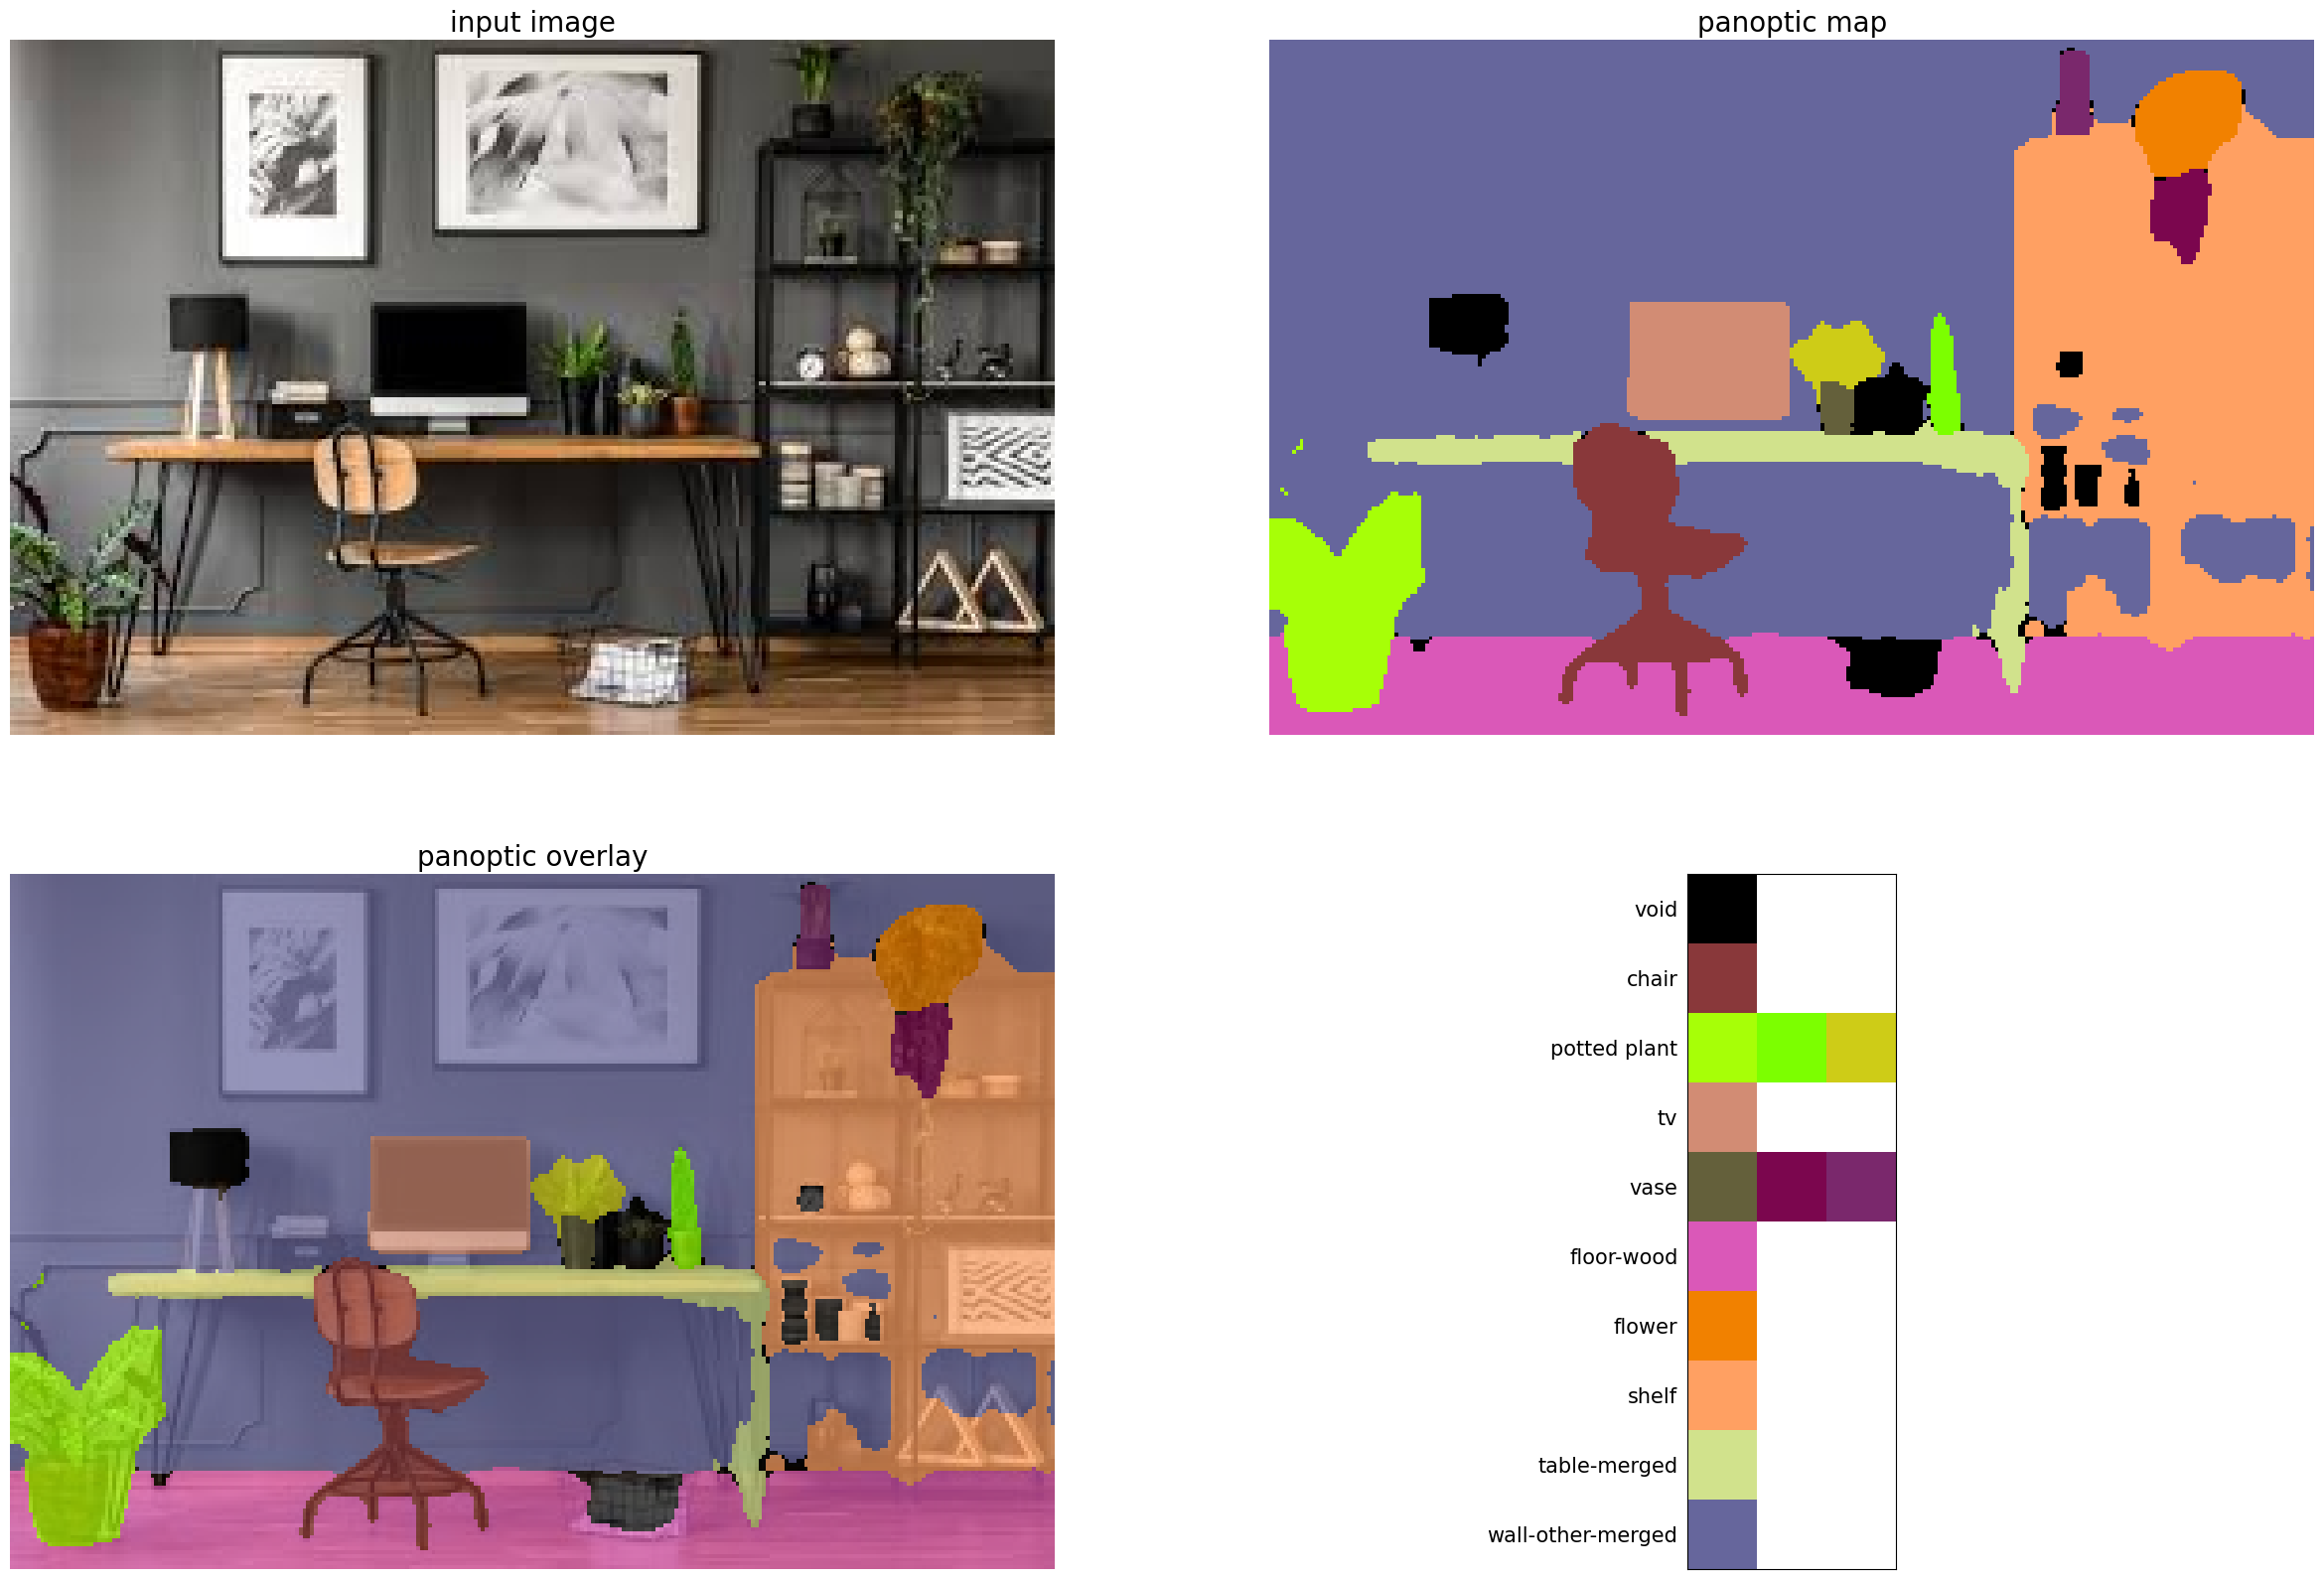

In [15]:
SAMPLE_IMAGE = 'images.jpeg'

with tf.io.gfile.GFile(SAMPLE_IMAGE, 'rb') as f:
  im = np.array(Image.open(f))

output = LOADED_MODEL(tf.cast(im, tf.uint8))
vis_segmentation(im, output['panoptic_pred'][0], DATASET_INFO)